In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [7]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [8]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=20,batch_size=128,shuffle='true',validation_data=(x_test, y_test))



Epoch 1/20
391/391 [==============================] - 15s 14ms/step - loss: 1.7079 - accuracy: 0.3723 - val_loss: 1.4444 - val_accuracy: 0.4790
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.3583 - accuracy: 0.5149 - val_loss: 1.2901 - val_accuracy: 0.5397
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 1.2110 - accuracy: 0.5702 - val_loss: 1.1593 - val_accuracy: 0.5935
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 1.1157 - accuracy: 0.6111 - val_loss: 1.1015 - val_accuracy: 0.6145
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 1.0469 - accuracy: 0.6349 - val_loss: 1.0414 - val_accuracy: 0.6329
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.9951 - accuracy: 0.6501 - val_loss: 1.0165 - val_accuracy: 0.6424
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.9473 - accuracy: 0.6690 - val_loss: 0.9967 - val_accuracy: 0.652

In [9]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.8875 - accuracy: 0.7080


313/313 [==============================] - 1s 4ms/step - loss: 0.8875 - accuracy: 0.7080


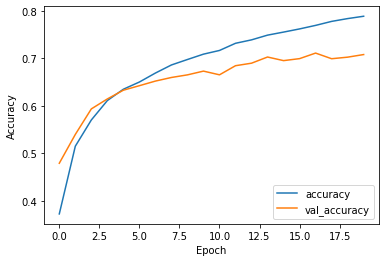

In [10]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)

Text(0, 0.5, 'Training losses')

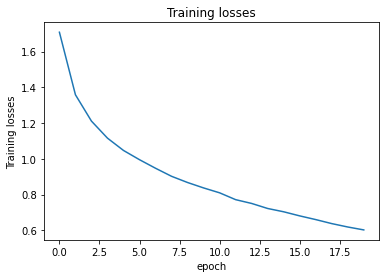

In [12]:
plt.plot(results.history['loss'])
plt.title('Training losses')
plt.xlabel('epoch')
plt.ylabel('Training losses')